In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/kaggle/input/titanic-surviver-data/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic-surviver-data/test.csv')
y_test = pd.read_csv('/kaggle/input/titanic-surviver-data/gender_submission.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.drop(['Cabin'] , axis = 1 , inplace = True)

In [8]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
data['Embarked'] = data['Embarked'].fillna('S')

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


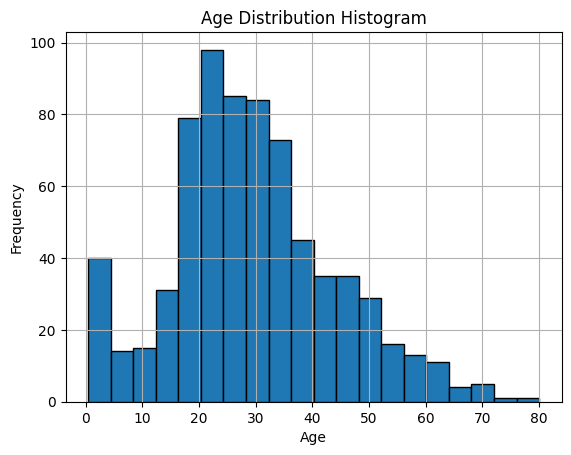

In [12]:
plt.hist(data['Age'], bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.grid(True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


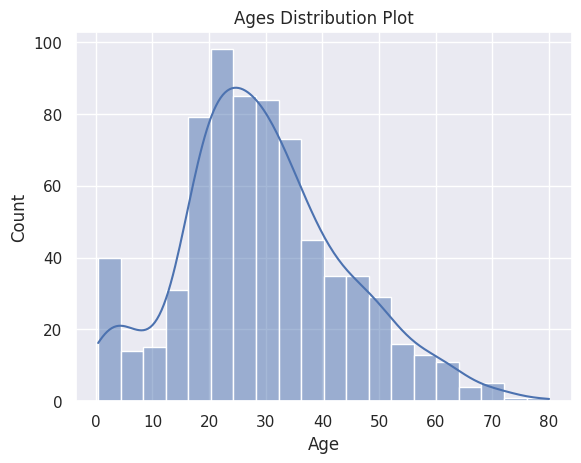

In [13]:
#Age distribution plot 

sns.set()
# Create a distribution plot
sns.histplot(data['Age'] , kde = True)

# Add labels and title (optional)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages Distribution Plot')

# Show the plot
plt.show()

In [14]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [15]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Visualization 

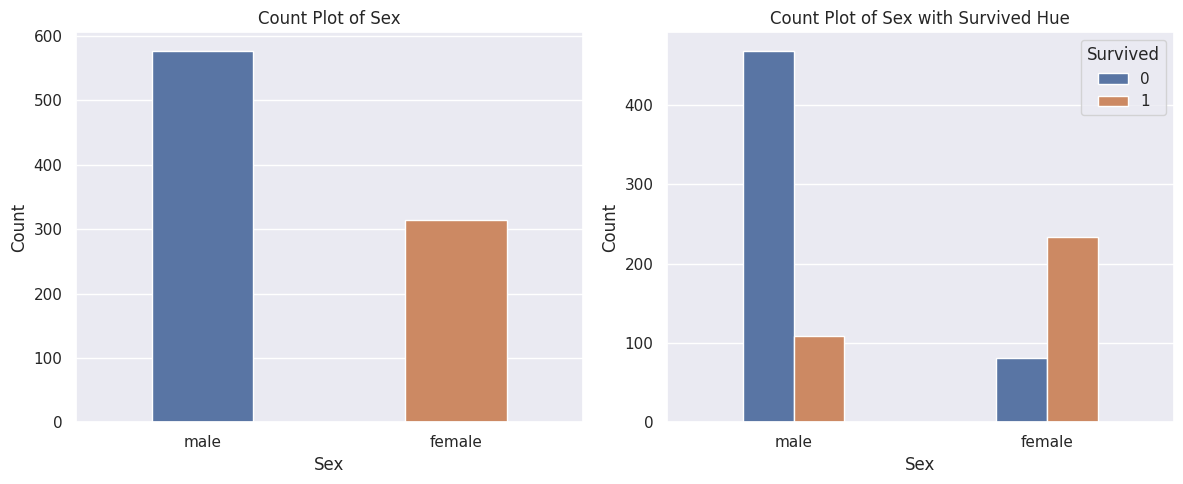

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust the figure size as needed

# Plot the first count plot on the first axis
sns.countplot(data=data, x='Sex', ax=axes[0], width=0.4)
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot of Sex')

# Plot the second count plot on the second axis
sns.countplot(data=data, x='Sex', hue='Survived', ax=axes[1], width=0.4)
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
axes[1].set_title('Count Plot of Sex with Survived Hue')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Text(0.5, 1.0, 'Count Plot survived of Embarked port ')

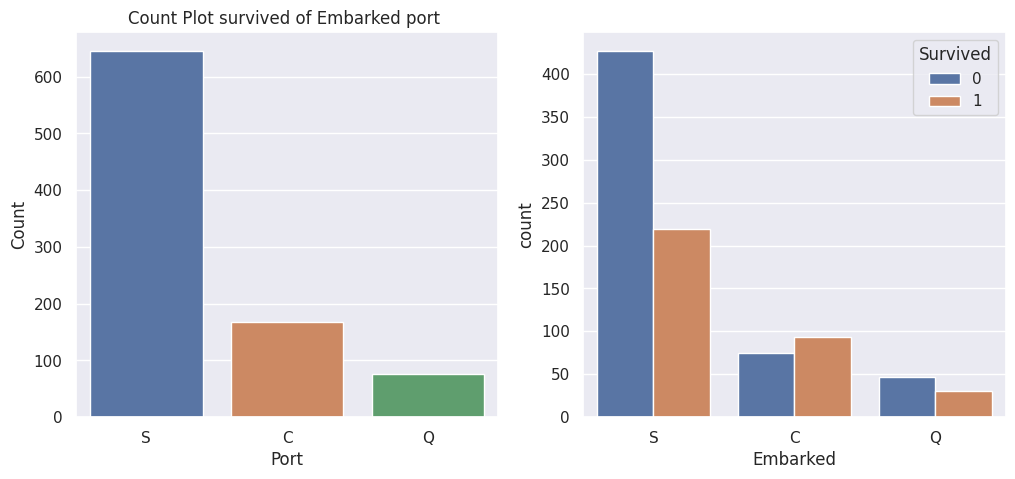

In [17]:
fig , axes = plt.subplots(1 , 2 , figsize = (12,5))
sns.countplot(data = data ,  x ='Embarked' , ax = axes[0])
axes[0].set_xlabel('Port')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot of Embarked port')

sns.countplot(data = data ,  x ='Embarked' , hue = 'Survived' , ax = axes[1])
axes[0].set_xlabel('Port')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot survived of Embarked port ')

Text(0.5, 1.0, 'Count Plot survived of each class ')

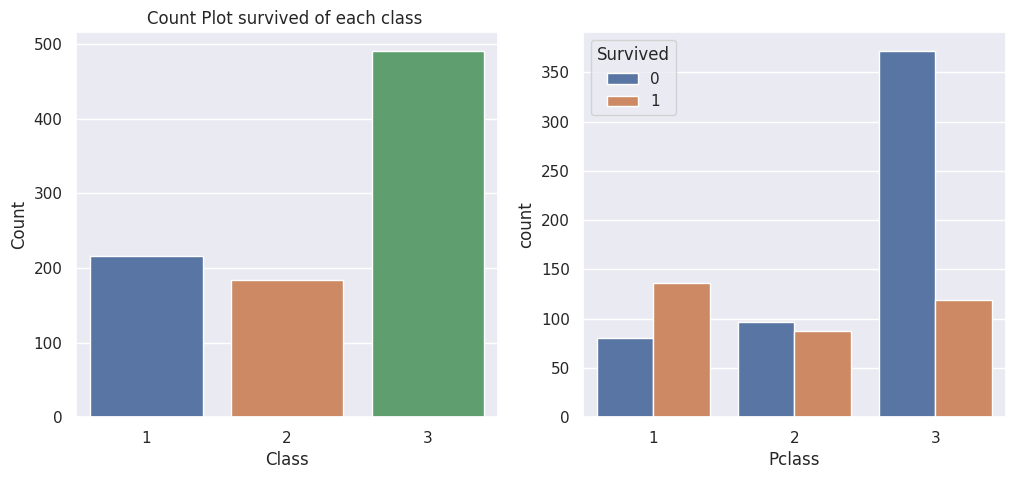

In [18]:
fig , axes = plt.subplots(1 , 2 , figsize = (12,5))
sns.countplot(data = data ,  x ='Pclass' , ax = axes[0])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot of classes')

sns.countplot(data = data ,  x ='Pclass' , hue = 'Survived' , ax = axes[1])
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot survived of each class ')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


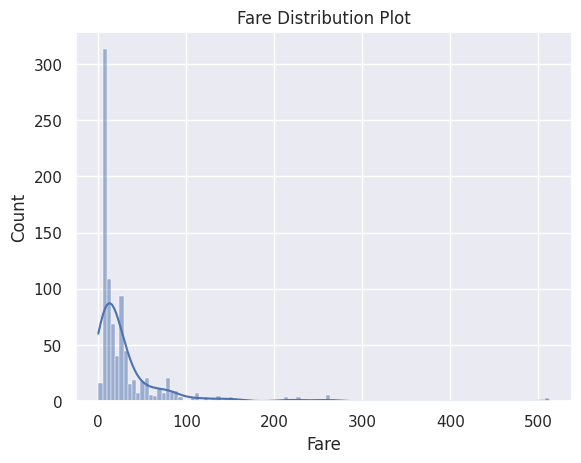

In [19]:
#Age distribution plot 

sns.set()
# Create a distribution plot
sns.histplot(data['Fare'] , kde = True)

# Add labels and title (optional)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution Plot')

# Show the plot
plt.show()

In [20]:
# data['Fare'] = np.log(data['Fare'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


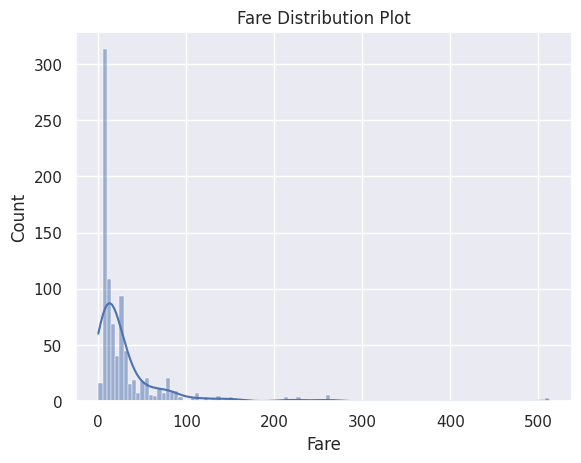

In [21]:
#Age distribution plot 

sns.set()
# Create a distribution plot
sns.histplot(data['Fare'] , kde = True)

# Add labels and title (optional)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution Plot')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Count Plot survived -SibSp ')

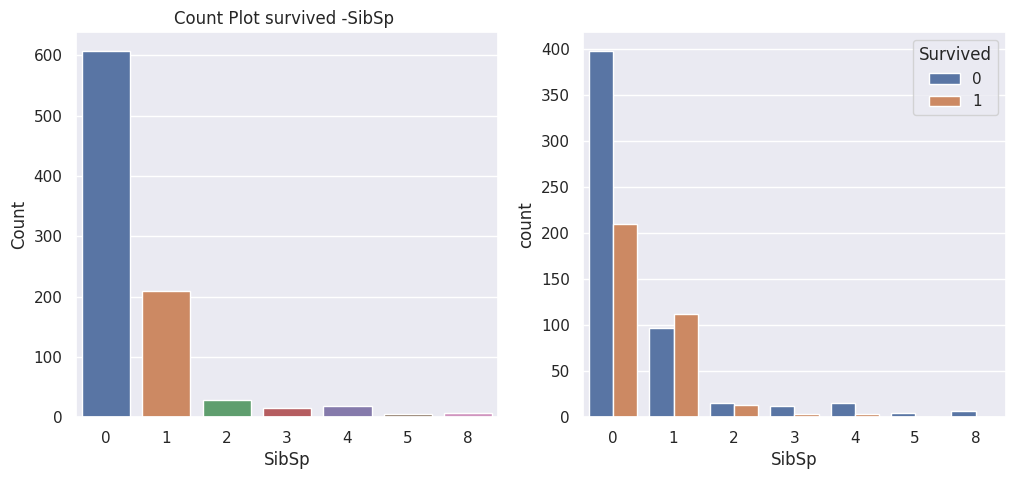

In [22]:
fig , axes = plt.subplots(1 , 2 , figsize = (12,5))
sns.countplot(data = data ,  x ='SibSp' , ax = axes[0])
axes[0].set_xlabel('SibSp')
axes[0].set_ylabel('SibSp')
axes[0].set_title('Count Plot of SibSp')

sns.countplot(data = data ,  x ='SibSp' , hue = 'Survived' , ax = axes[1])
axes[0].set_xlabel('SibSp')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot survived -SibSp ')

Text(0.5, 1.0, 'Count Plot survived - Parch ')

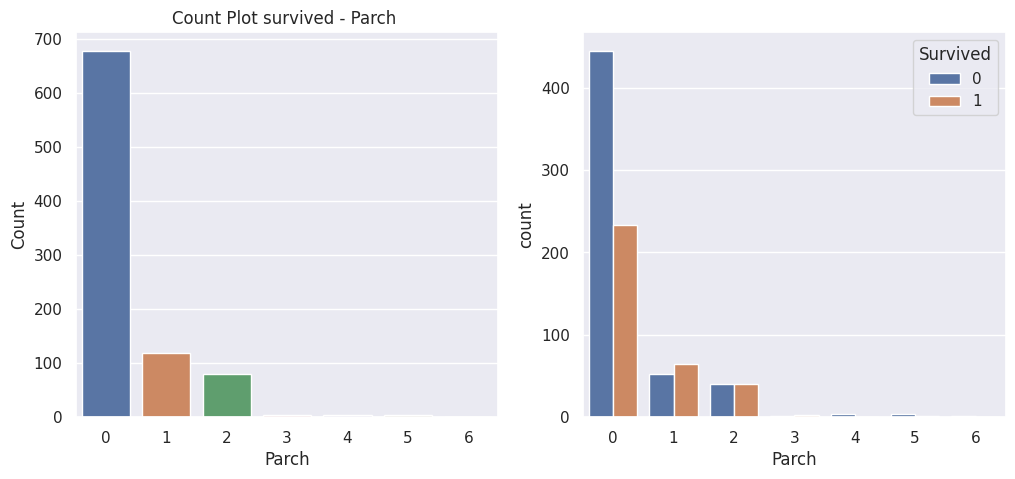

In [23]:
fig , axes = plt.subplots(1 , 2 , figsize = (12,5))
sns.countplot(data = data ,  x ='Parch' , ax = axes[0])
axes[0].set_xlabel('Parch')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot of Parch')

sns.countplot(data = data ,  x ='Parch' , hue = 'Survived' , ax = axes[1])
axes[0].set_xlabel('Parch')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot survived - Parch ')

In [24]:
data.replace( {'male' : 0 , 'female':1} , inplace = True)
data.replace( {'S' : 0 , 'C':1 , 'Q':2} , inplace = True)

data

/tmp/ipykernel_13/202854955.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace( {'male' : 0 , 'female':1} , inplace = True)
/tmp/ipykernel_13/202854955.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace( {'S' : 0 , 'C':1 , 'Q':2} , inplace = True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [25]:
data_1 = data.drop(['PassengerId' ,'Ticket' , 'Name' ] , axis = 1)

In [26]:
# np.isinf(data_1).sum()
# data_1.replace({np.inf : np.nan , -np.inf : np.nan} , inplace = True)
# data_1.dropna(inplace =  True)
# np.isinf(data_1).sum()


In [27]:
x = data_1.drop(['Survived']  , axis = 1) 
y = data_1['Survived']

In [28]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
model = LogisticRegression()

In [31]:
model.fit(x , y )

LogisticRegression()

In [32]:
y_predict = model.predict(x)

In [33]:
accurracy = accuracy_score(y , y_predict)
print(accurracy)

0.8047138047138047


###Prreparing our testinf data



In [34]:
test_data = test_data.drop(['Cabin'] , axis=1)

In [35]:
test_data['Age']  =  test_data['Age'].fillna(test_data['Age'].mean())

In [36]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [37]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [38]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [40]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [41]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [42]:
test_data.replace( {'male' : 0 , 'female':1} , inplace = True)
test_data.replace( {'S' : 0 , 'C':1 , 'Q':2} , inplace = True)

/tmp/ipykernel_13/1449919747.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace( {'male' : 0 , 'female':1} , inplace = True)
/tmp/ipykernel_13/1449919747.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace( {'S' : 0 , 'C':1 , 'Q':2} , inplace = True)


In [43]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [44]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [45]:
x_test = test_data.drop(['Name', 'PassengerId' , 'Ticket'],axis=1)

In [46]:
x_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
y_test = y_test['Survived']


In [48]:
y_test.isna().sum()

0

In [49]:
y_predict = model.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test , y_predict)
print(accuracy)

0.9425837320574163


In [51]:
input_data = (3,0,22.000000,1,0,7.2500,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person did not survived')
else:
  print('The Person has survived')



[0]
The Person did not survived


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
